In [1]:
%matplotlib inline

In [2]:
cd Python_Scripts/

/Users/chowdahead/Python_Scripts


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import patheffects
from datetime import datetime
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
import glob, os

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import geopandas as gp

import numpy as np

In [5]:
os.chdir("../data/")

https://ftp.wpc.ncep.noaa.gov/shapefiles/noaa_chart/WPC_Day1_sigwx_latest.zip

In [9]:
day_num = 1
os.chdir("2021_08_11/")

In [11]:
! mkdir DAY"$day_num"_SIGWX_latest/


In [13]:
! curl -L https://ftp.wpc.ncep.noaa.gov/shapefiles/noaa_chart/WPC_Day"$day_num"_sigwx_latest.zip > DAY"$day_num"_SIGWX_latest.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5589  100  5589    0     0  11993      0 --:--:-- --:--:-- --:--:-- 11993


In [14]:
! tar xvzf DAY"$day_num"_SIGWX_latest.zip -C DAY"$day_num"_SIGWX_latest/

x WPC_Day1_sigwx_latest.dbf
x WPC_Day1_sigwx_latest.shx
x WPC_Day1_sigwx_latest.shp
x WPC_Day1_sigwx_latest.prj


In [15]:
PATH = f"DAY{day_num}_SIGWX_latest"
PATH

'DAY1_SIGWX_latest'

In [17]:

path = f"{PATH}"
shp =  glob.glob(f"{path}/*.shp")
shp

['DAY1_SIGWX_latest/WPC_Day1_sigwx_latest.shp']

In [18]:

shp = shp[0]
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
usa = gp.read_file(shp)
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
#usa #last 5 records in dataframe
usa

Shape of the dataframe: (2, 5)
Projection of dataframe: {'proj': 'longlat', 'R': 6371200, 'no_defs': True}


,ID,PRODUCT,VALID_DATE,SIG_WX_TYPE,geometry
0,1,Day 1 Significant Weather,08/12/21,Severe Thunderstorms,"POLYGON ((-87.99000 41.22000, -87.99000 41.250..."
1,2,Day 1 Significant Weather,08/12/21,Severe Thunderstorms,"POLYGON ((-78.95000 44.21000, -78.90000 44.230..."


In [19]:
usa.geometry.squeeze()

0    POLYGON ((-87.99000 41.22000, -87.99000 41.250...
1    POLYGON ((-78.95000 44.21000, -78.90000 44.230...
Name: geometry, dtype: geometry

In [72]:
dir(usa.geometry.squeeze().values)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binary_method',
 '_binop',
 '_can_hold_na',
 '_concat_same_type',
 '_crs',
 '_dtype',
 '_fill',
 '_formatter',
 '_from_factorized',
 '_from_sequence',
 '_from_sequence_of_strings',
 '_reduce',
 '_typ',
 '_values_for_argsort',
 '_values_for_factorize',
 'affine_transform',
 'almost_equals',
 'area',
 'argmax',
 'argmin',
 'argsort',
 'astype',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'check_geographic_crs',
 'contains',
 'convex_hull',
 'copy',
 'covered_by',
 'covers',
 'crosses',
 'crs',
 'data',
 'difference',
 'disjoint',


In [46]:
usa.geometry.area

/Users/chowdahead/anaconda3/envs/comet-viewer/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     3.44325
1    83.11785
2    85.81455
dtype: float64

In [20]:
usa.crs

{'proj': 'longlat', 'R': 6371200, 'no_defs': True}

In [21]:
list(usa.SIG_WX_TYPE.unique())

['Severe Thunderstorms']

In [26]:
tstorm = usa[usa.SIG_WX_TYPE == "Severe Thunderstorms"]
tstorm

,ID,PRODUCT,VALID_DATE,SIG_WX_TYPE,geometry
0,1,Day 1 Significant Weather,08/12/21,Severe Thunderstorms,"POLYGON ((-87.99000 41.22000, -87.99000 41.250..."
1,2,Day 1 Significant Weather,08/12/21,Severe Thunderstorms,"POLYGON ((-78.95000 44.21000, -78.90000 44.230..."


In [23]:
crs = usa.crs
crs

{'proj': 'longlat', 'R': 6371200, 'no_defs': True}

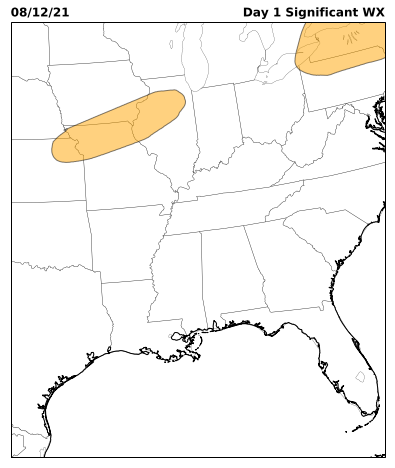

In [27]:

   
    # Set Projection of Plot
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)
    
    # Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-99., -80., 25., 44.]
    
    
fig = plt.figure(figsize=(10., 8.))
    
    #add_metpy_logo(fig, 25, 950, size='small')
    
                                        # Add the Map 
    #---------------------------------------------------------------------------------------------------
ax = plt.subplot(111, projection=plotcrs)
    
    
    # Set extent and plot map lines
ax.set_extent(extent)
         
ax.coastlines(resolution='10m')
    
                                # Add State/Country Boundaries to Plot
    #---------------------------------------------------------------------------------------------------    
   
    #ax.add_feature(cfeature.BORDERS,edgecolor="k")
    #ax.add_feature(cfeature.LAND,facecolor="k",linewidth=0.2)
    #ax.add_feature(cfeature.OCEAN,facecolor="k",linewidth=0.2,edgecolor="k")
    #ax.add_feature(cfeature.LAKES,facecolor="k",linewidth=0.2,edgecolor="k",)
    
state_borders = cfeature.NaturalEarthFeature(
                    category='cultural', name='admin_1_states_provinces_lines',
                    scale='10m',facecolor='none')
ax.add_feature(state_borders, edgecolor='k', linewidth=0.35)
        
country_borders = cfeature.NaturalEarthFeature(category='cultural',
                    name='admin_0_countries',scale='10m', facecolor='none')
ax.add_feature(country_borders,edgecolor='k',linewidth=0.2)
    
    
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        facecolor="w")
ax.add_feature(lakes,edgecolor='k',linewidth=0.2)
      
#ax.add_feature(cfeature.BORDERS,edgecolor="w")
ax.add_feature(cfeature.LAND,facecolor="w",linewidth=0.2)
ax.add_feature(cfeature.OCEAN,facecolor="w",linewidth=0.2,edgecolor="k")

#ax.add_feature(COUNTIES)
ax.add_geometries(tstorm["geometry"],crs=ccrs.PlateCarree(),
                  facecolor="orange",edgecolor="k",alpha=0.5)

#ax.add_geometries(crit["geometry"],crs=ccrs.PlateCarree(),
#                  facecolor="red",edgecolor="k",alpha=0.5,zorder=100)
#ax.add_geometries(extr["geometry"],crs=ccrs.PlateCarree(),
#                  facecolor="k",edgecolor="k",alpha=0.5)

#ax.add_geometries(high["geometry"],crs=ccrs.PlateCarree(),facecolor="r",edgecolor="k",alpha=0.5)

#ax.text(-129.5,20.3, "Slight (10-39%)", size=18,
#        color="b", bbox=dict(fc="none"),transform=ccrs.PlateCarree())

outline_effect = [patheffects.withStroke(linewidth=1.5, foreground='k')] 
texts = ['Elevated','Critical','Extreme']
colors = ['orange','red','#FF69B4']
Texts = []
   # Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
'''
for t,c in zip(texts,colors):
    Texts.append(TextArea(t,textprops=dict(color=c,fontsize=15,path_effects=outline_effect)))
    
texts_vbox = VPacker(children=Texts,pad=1,sep=5)
ann = AnnotationBbox(texts_vbox,(.012,0.1),xycoords=ax.transAxes,
                            box_alignment=(0,.5),bboxprops = 
                            dict(facecolor='w',boxstyle='round',edgecolor='k'))
ann.set_figure(fig)
fig.artists.append(ann)
'''
#prod = usa['PRODUCT'][0].replace("probability","prob.").replace("greater than",">").replace("inches","in.")

outline_effect2 = [patheffects.withStroke(linewidth=1.5, foreground='w')] 
ax.set_title(f"Day {day_num} Significant WX",loc='right',color='k', fontsize=12, weight='bold',
            path_effects=outline_effect2)

ax.set_title(usa["VALID_DATE"][0],loc='left',color='k', fontsize=12, weight='bold',
            path_effects=outline_effect2)

#prod_time = ax.text(0.99, 0.01,prod ,
#                            horizontalalignment='right', transform=ax.transAxes,
#                            color='white', fontsize=7, weight='bold')

#prod_time.set_path_effects(outline_effect)
    

#fig.savefig(f"{2021_03_17}_day{day_num}_sigwx_3.png",bbox_inches="tight",dpi=120)
fig.savefig(f"{2021_03_17}_day{day_num}_sigwx_zoomed.png",bbox_inches="tight",dpi=120)

In [ ]:
elev.plot()